# **Problem Description and Mathematical Modelling**

The goal is to maximize the **total profit** from operating three power generators while respecting constraints on gas availability, minimum demand, and individual generator capacity.

---

## Variables and Parameters

* **Decision Variables:**

  * $G_j$: Electricity generated (in MWh) by generator $j$, for $j \in \{1,2,3\}$.

* **Parameters:**

  * $c_j$: Profit per MWh from generator $j$.

    $$
    c_1 = 45, \quad c_2 = 55, \quad c_3 = 40
    $$
  * $a_j$: Gas units required to produce 1 MWh from generator $j$.

    $$
    a_1 = 10, \quad a_2 = 8, \quad a_3 = 12
    $$
  * $B$: Total available gas units.

    $$
    B = 4200
    $$
  * $D$: Minimum electricity demand (MWh).

    $$
    D = 400
    $$
  * $U_j$: Maximum capacity of generator $j$.

    $$
    U_1 = 200, \quad U_2 = 300, \quad U_3 = 150
    $$

---

## Optimization Model

We formulate the problem as a **Linear Program (LP):**

$$
\begin{aligned}
\text{Maximize} \quad & \sum_{j=1}^{3} c_j G_j \\
\text{subject to} \quad
& \sum_{j=1}^{3} a_j G_j \le B & (\text{Gas Availability}) \\
& \sum_{j=1}^{3} G_j \ge D & (\text{Minimum Demand}) \\
& 0 \leq G_j \leq U_j & (\text{Capacity Constraints}) \\
& G_j \ge 0 & \quad (\text{Non-negativity})
\end{aligned}
$$

---

## Specific Model with Parameter Values

$$
\begin{aligned}
\text{Maximize} \quad & 45G_1 + 55G_2 + 40G_3 \\
\text{subject to} \quad
& 10G_1 + 8G_2 + 12G_3 \le 4200 \\
& G_1 + G_2 + G_3 \ge 400 \\
& G_1 \le 200 \\
& G_2 \le 300 \\
& G_3 \le 150 \\
& G_1, G_2, G_3 \ge 0
\end{aligned}
$$


# **Linear Programming and Sensitivity Analysis**

## Gurobi:

In [3]:
!pip install gurobipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 99.6 MB/s eta 0:00:00


In [2]:
import gurobipy as gp
from gurobipy import GRB, quicksum, Model

# ------------------ Problem Parameters ------------------ #
# Number of generators
n_generators = 3

# Profit per MWh for each generator
profits = [45, 55, 40]  # Profit for Generator 1, 2, 3

# Gas consumption per MWh for each generator
gas_usage = [10, 8, 12] # Gas units needed for G1, G2, G3

# Total gas available (right-hand side limit)
gas_available = 4200

# Minimum electricity demand (right-hand side requirement)
min_demand = 400

# Maximum production capacity for each generator
upper_limits = [200, 300, 150] # Max MWh for G1, G2, G3

# ------------------ Create the Gurobi Model ------------------ #
model = Model("PowerPlantOptimization")

# ------------------ Variables ------------------ #
# We add variables for each generator's output, with lower bound 0 and upper bounds based on capacity
x = model.addVars(n_generators, lb=0, ub=upper_limits, name="Generator")

# ------------------ Objective ------------------ #
# Maximize the total profit
model.setObjective(quicksum(profits[j] * x[j] for j in range(n_generators)), GRB.MAXIMIZE)

# ------------------ Constraints ------------------ #
# Add the gas availability constraint (less than or equal to)
model.addConstr(quicksum(gas_usage[j] * x[j] for j in range(n_generators)) <= gas_available, name="Gas_Availability")

# Add the minimum demand constraint (greater than or equal to)
model.addConstr(quicksum(x[j] for j in range(n_generators)) >= min_demand, name="Min_Demand")

# ------------------ Solve the Model ------------------ #
print("Solving the Power Plant Optimization Problem...")
model.optimize()

# ------------------ Display Solution ------------------ #
if model.status == GRB.OPTIMAL:
    print("\n### Optimal Power Generation Plan ###")
    for var in model.getVars():
        print(f"{var.varName}: {var.x:.2f} MWh")
    print(f"\nTotal Profit: ${model.objVal:.2f}")

    # ------------------ Sensitivity Analysis ------------------ #
    print("\n### Sensitivity Analysis on Generator Profits ###")
    print("Variable: Current Profit, Allowable Increase, Allowable Decrease")
    for var in model.getVars():
        print(f"{var.varName}: ${var.obj}, ${var.SAObjUp - var.obj:.2f}, ${var.obj - var.SAObjLow:.2f}")

    print("\n### Sensitivity Analysis on Constraint RHS ###")
    print("Constraint: Current RHS, Allowable Increase, Allowable Decrease")
    for constr in model.getConstrs():
        print(f"{constr.ConstrName}: {constr.RHS}, {constr.SARHSUp - constr.RHS:.2f}, {constr.RHS - constr.SARHSLow:.2f}")

    print("\n### Shadow Prices (Dual Values) ###")
    print("Constraint: Shadow Price")
    for constr in model.getConstrs():
        print(f"{constr.ConstrName}: ${constr.pi:.4f}")

    print("\n### Reduced Costs ###")
    print("Variable: Reduced Cost")
    for var in model.getVars():
        print(f"{var.varName}: ${var.RC:.4f}")

Restricted license - for non-production use only - expires 2026-11-23
Solving the Power Plant Optimization Problem...
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 2 rows, 3 columns and 6 nonzeros
Model fingerprint: 0x64b18bc4
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [4e+01, 6e+01]
  Bounds range     [2e+02, 3e+02]
  RHS range        [4e+02, 4e+03]
Presolve time: 0.01s
Presolved: 2 rows, 3 columns, 6 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.8875000e+04   1.125000e+02   0.000000e+00      0s
       1    2.4600000e+04   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds (0.00 work units)
Optimal objective  2.460000000e+04

### Optimal Power Generation Plan ###
Generator[0]: 

## 📊 Explanation of Optimization and Sensitivity Analysis Results

We solved a **Power Plant Optimization Problem** with 3 generators.  
Below is a detailed explanation of the results:

---

### 🔹 1. Optimal Solution
- **Generator[0]: 180 MWh**  
- **Generator[1]: 300 MWh (at full capacity)**  
- **Generator[2]: 0 MWh (not used)**  

**Total Profit = $24,600**

👉 The most profitable plan is to run:
- G1 at $180$ MWh  
- G2 at full capacity ($300$ MWh)  
- G3 not at all  

Reason: G2 is the most **efficient in terms of profit per unit of gas consumed**.

---

### 🔹 2. Binding vs Non-binding Constraints
- **Gas_Availability** = $4200$ units  
  - Exactly used $(180×10 + 300×8 = 4200)$ → **binding constraint** → so shadow price is positive .
- **Min_Demand** = $400$ MWh  
  - Actual production = $480$ MWh $(> 400)$ → **non-binding constraint** → so shadow price = 0.

👉 Gas is the bottleneck, not demand.

---

### 🔹 3. Sensitivity Analysis on Generator Profits
Shows how much the objective coefficients (profits) can change before the solution changes:

- **Generator[0]**:  
  - Profit = $45$  
  - Range: $[33.33, 68.75]$ → stays in solution  
- **Generator[1]**:  
  - Profit = $55$
  - Range: $[36, ∞)$ → very strong, always used unless profit drops a lot  
- **Generator[2]**:  
  - Profit = $40$  
  - Needs to rise $≥ 54$ to enter solution  

👉 Interpretation:  
- G2 is the most valuable.  
- G1 is moderately valuable.  
- G3 is unattractive unless profit rises significantly.  

---

### 🔹 4. Sensitivity Analysis on Constraints (RHS ranges)
- **Gas_Availability (4200)**  
  - Can **increase by 200** (to 4400) or **decrease by 800** (to 3400) before solution changes.  
- **Min_Demand (400)**  
  - Can **increase by 80** (to 480) or decrease infinitely without affecting solution.  

👉 Gas constraint is critical. Demand is not restrictive.

---
### 🔹 5. Shadow Prices (Dual Values)

Shadow prices (also called **dual values**) tell us the *marginal value* of relaxing a constraint by one unit.

- **Gas_Availability: $4.50$**  
  - Interpretation: If we could obtain **one more unit of gas**, the total profit would increase by **$4.50$**.  
  - This shows how valuable gas is in the system: it is the **scarcest resource**.  
  - The effect is valid only within the sensitivity range ($±200$ units). Beyond that, the generator mix might change, and the shadow price would no longer be constant.  

- **Min_Demand: $0.00$**  
  - Interpretation: Increasing the minimum demand requirement by $1$ MWh has **no effect** on profit.  
  - Why? Because the current production (480 MWh) already exceeds the minimum requirement (400 MWh). The demand constraint is therefore **non-binding**.  
  - A non-binding constraint always has a shadow price of zero, meaning it does not influence the optimal solution.  

👉 **Economic Insight:**  
- Gas is the limiting resource and has a clear marginal value in profit terms.  
- Demand is not limiting — the plant already produces more than the minimum required, so relaxing or tightening that constraint (within range) has no effect on the solution.

---

### 🔹 6. Reduced Costs

Reduced cost tells us how much the objective coefficient (profit per MWh) would need to **change** before a variable that is currently at zero or at a bound would become profitable to adjust.

- **Generator[0]: $0.00$**  
  - This generator is **used in the solution (180 MWh)** (basic variable), so its reduced cost is 0.  
  - Interpretation: it is optimally balanced with the constraints, and no change in profit is required for it to remain in the solution.  

- **Generator[1]: $19.00$**  
  - This generator is at its **upper bound (300 MWh)**.  
  - The reduced cost means: if its profit per MWh **dropped by up to $19$**, it would still be optimal to keep G2 fully loaded.  
  - Only if profit fell below $36$ $(55 – 19)$ would the model reduce its usage.  
  - Interpretation: G2 is so profitable that it is "pushed to the max" until profit drops significantly.  

- **Generator[2]: -$14.00$**  
  - This generator is at **0 MWh production**.  
  - The negative reduced cost means: for G3 to become worthwhile, its profit must **increase by at least $14$** (from $40$ to $≥ 54$).  
  - Until then, using G3 would reduce overall profit.  
  - Interpretation: G3 is unattractive unless its economics improve.  


👉 Reduced cost explains why G2 is maxed out and G3 is excluded.

---

### 🔹 Overall Story
- The system is **gas-constrained** (not demand-constrained).  
- **G2 is the best generator** → fully used.  
- **G1 is used partially**.  
- **G3 is too inefficient** to run.  
- Each extra gas unit is worth **$4.50**.  
- The solution is stable to small changes, but very sensitive to **gas availability** and **G2’s profit**.


In [34]:
import gurobipy as gp
from gurobipy import GRB, quicksum

# ------------------ Problem Parameters ------------------ #
n_generators = 3
profits = [45, 55, 40]      # $/MWh
gas_usage = [10, 8, 12]     # units of gas per MWh
gas_available = 4200
min_demand = 400
upper_limits = [200, 300, 150]

# ------------------ Create the Gurobi Model ------------------ #
model = gp.Model("PowerPlantOptimization")
model.Params.OutputFlag = 0  # suppress solver output

# Variables
x = model.addVars(n_generators, lb=0, ub=upper_limits, name="Generator")

# Objective
model.setObjective(quicksum(profits[j] * x[j] for j in range(n_generators)), GRB.MAXIMIZE)

# Constraints
gas_constr = model.addConstr(quicksum(gas_usage[j] * x[j] for j in range(n_generators)) <= gas_available, name="Gas_Availability")
demand_constr = model.addConstr(quicksum(x[j] for j in range(n_generators)) >= min_demand, name="Min_Demand")

# Solve
model.optimize()

# ------------------ Shadow Price Analysis ------------------ #
if model.status == GRB.OPTIMAL:
    gas_shadow = gas_constr.pi
    print(f"Shadow Price of Gas: ${gas_shadow:.2f} per extra unit of gas")

    # Compute total value of extra gas (e.g., 100 units)
    extra_gas = 100
    marginal_value = gas_shadow * extra_gas
    print(f"Total marginal value of {extra_gas} extra gas units: ${marginal_value:.2f}")

    # Compare with profit per unit gas for each generator
    print("\nGenerator Profit per Gas Unit:")
    for j in range(n_generators):
        profit_per_gas = profits[j] / gas_usage[j]
        print(f"Generator {j+1}: ${profit_per_gas:.2f} per gas unit")

    # Identify which generators are most efficient relative to shadow price
    print("\nInterpretation:")
    for j in range(n_generators):
        profit_per_gas = profits[j] / gas_usage[j]
        if profit_per_gas >= gas_shadow:
            print(f"Generator {j+1} is efficient (profit/gas >= shadow price), likely to run.")
        else:
            print(f"Generator {j+1} is inefficient (profit/gas < shadow price), less likely to run.")

Shadow Price of Gas: $4.50 per extra unit of gas
Total marginal value of 100 extra gas units: $450.00

Generator Profit per Gas Unit:
Generator 1: $4.50 per gas unit
Generator 2: $6.88 per gas unit
Generator 3: $3.33 per gas unit

Interpretation:
Generator 1 is efficient (profit/gas >= shadow price), likely to run.
Generator 2 is efficient (profit/gas >= shadow price), likely to run.
Generator 3 is inefficient (profit/gas < shadow price), less likely to run.


# **Parametric Analysis**

## Parametric Analysis: Effect of Generator 3 Profit

Parametric Analysis for Vary profits (e.g., increase generator 3’s profit gradually) to see when it enters the solution.

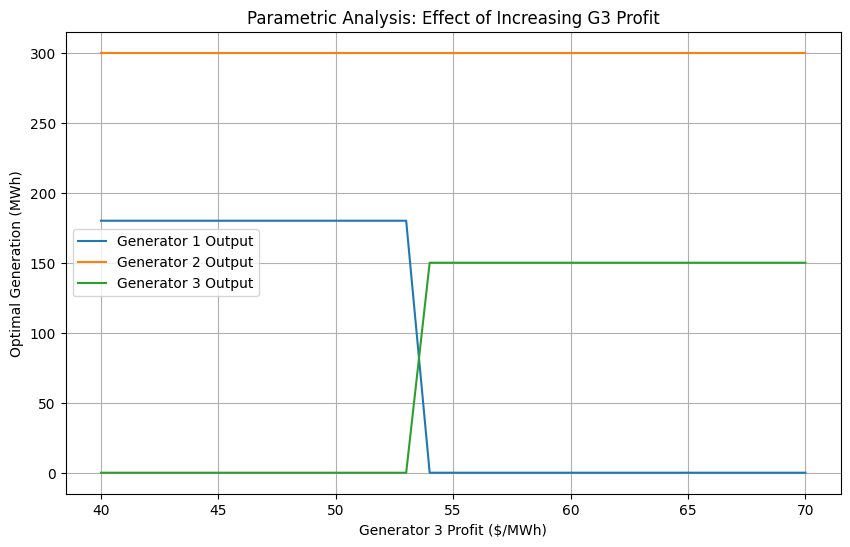

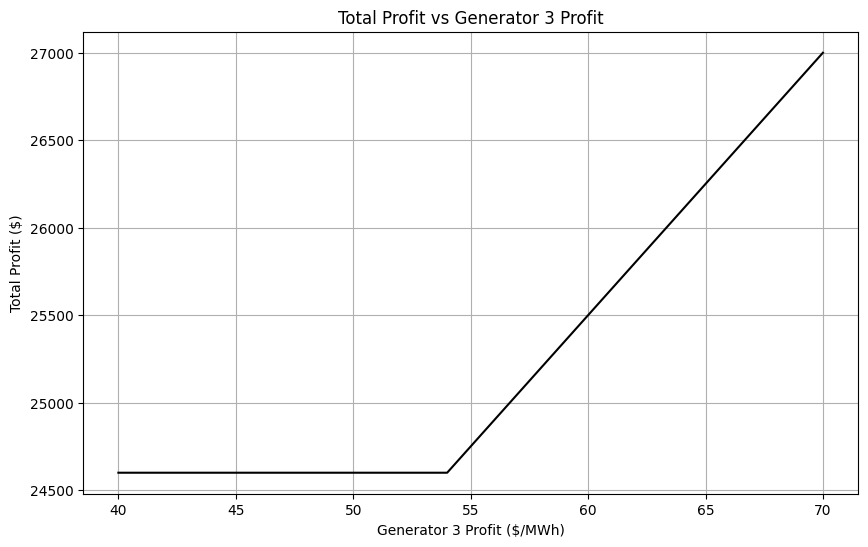

In [6]:
import gurobipy as gp
from gurobipy import GRB, quicksum
import numpy as np
import matplotlib.pyplot as plt

# ------------------ Problem Parameters ------------------ #
n_generators = 3
profits_base = [45, 55, 40]  # base profits
gas_usage = [10, 8, 12]
gas_available = 4200
min_demand = 400
upper_limits = [200, 300, 150]

# Range of Generator 3 profits to test
gen3_profit_range = np.linspace(40, 70, 31)  # 40 -> 70 in steps of 1

# Store results
x1_vals = []
x2_vals = []
x3_vals = []
profit_vals = []

for p3 in gen3_profit_range:
    profits = [profits_base[0], profits_base[1], p3]

    # Create model
    model = gp.Model()
    model.Params.OutputFlag = 0  # suppress Gurobi output

    # Variables
    x = model.addVars(n_generators, lb=0, ub=upper_limits)

    # Objective
    model.setObjective(quicksum(profits[j] * x[j] for j in range(n_generators)), GRB.MAXIMIZE)

    # Constraints
    model.addConstr(quicksum(gas_usage[j] * x[j] for j in range(n_generators)) <= gas_available)
    model.addConstr(quicksum(x[j] for j in range(n_generators)) >= min_demand)

    # Solve
    model.optimize()

    # Store results
    x1_vals.append(x[0].x)
    x2_vals.append(x[1].x)
    x3_vals.append(x[2].x)
    profit_vals.append(model.objVal)

# ------------------ Plot Results ------------------ #
plt.figure(figsize=(10,6))
plt.plot(gen3_profit_range, x1_vals, label="Generator 1 Output")
plt.plot(gen3_profit_range, x2_vals, label="Generator 2 Output")
plt.plot(gen3_profit_range, x3_vals, label="Generator 3 Output")
plt.xlabel("Generator 3 Profit ($/MWh)")
plt.ylabel("Optimal Generation (MWh)")
plt.title("Parametric Analysis: Effect of Increasing G3 Profit")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plt.plot(gen3_profit_range, profit_vals, color='black')
plt.xlabel("Generator 3 Profit ($/MWh)")
plt.ylabel("Total Profit ($)")
plt.title("Total Profit vs Generator 3 Profit")
plt.grid(True)
plt.show()

This code performs a **parametric analysis** to investigate how the optimal solution of a power plant optimization problem changes as we vary a key parameter: the profit of Generator 3. The goal is to determine at what point Generator 3 becomes profitable enough to be included in the optimal generation plan.

The analysis is performed by systematically increasing Generator 3's profit from **\$40/MWh** to **\$70/MWh**. For each profit value, the linear programming model is solved to obtain the optimal power generation for all three generators and the corresponding total profit. The results are then plotted to visualize the relationships.

---

### Explanation of the Plots

**1. Optimal Output per Generator vs Generator 3 Profit**

* **Constant Generation:** For Generator 3 profits up to **\$54/MWh**, the optimal solution remains unchanged. Generator 3's output is **0 MWh**, as it is not profitable enough compared to Generators 1 and 2, which operate at their near-capacities.
* **Shift in Generation:** When Generator 3's profit exceeds **\$54/MWh**, the optimal solution changes. Generator 3 begins producing electricity, and the outputs of Generators 1 and 2 decrease to satisfy demand and gas constraints.
* **New Optimal Solution:** As Generator 3's profit rises further, it becomes more dominant. At **\$70/MWh**, Generator 3 reaches its maximum capacity of **150 MWh**, while Generator 2 falls to **150 MWh** and Generator 1 to **100 MWh**.

**2. Total Profit vs Generator 3 Profit**

* **No Change:** While Generator 3 is not part of the solution (profit below **\$54/MWh**), the total profit remains constant at **\$24,600**. This reflects the **sensitivity analysis**, where Generator 3’s reduced cost is \$14.
* **Profit Increase:** Once Generator 3's profit exceeds **\$54/MWh**, it enters the optimal solution, and the total profit increases linearly with each additional dollar of profit, proportional to the electricity produced by Generator 3.

**Key Insight:** This parametric analysis highlights **thresholds where Generator 3 becomes economically attractive**, showing how linear programming solutions respond to changes in parameters.

## Parametric Analysis: Effect of Gas Availability

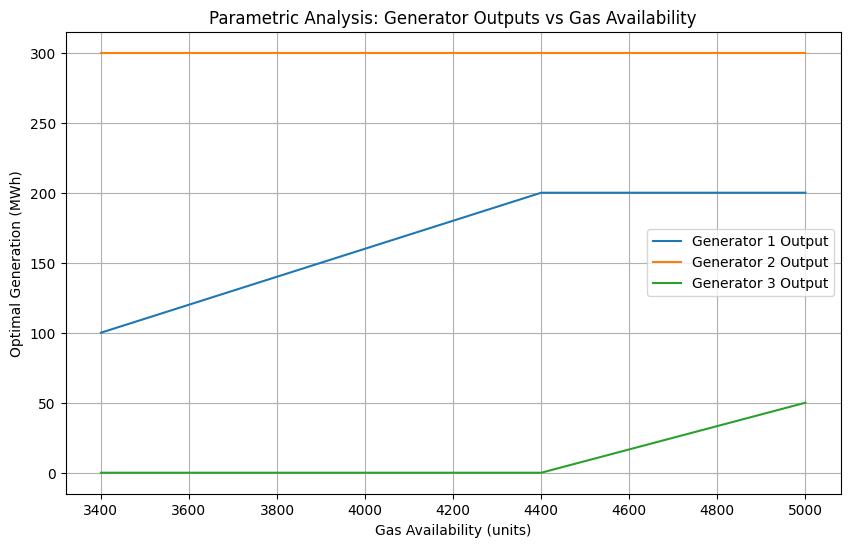

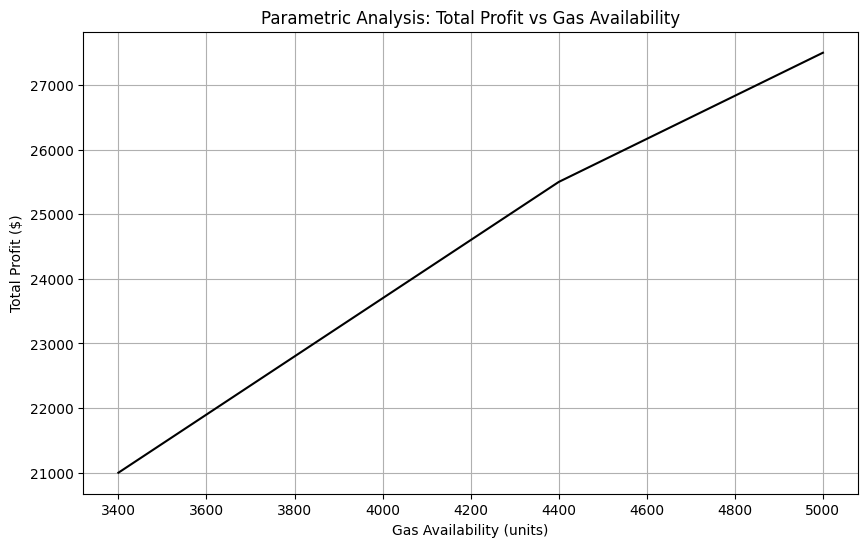

In [8]:
import gurobipy as gp
from gurobipy import GRB, quicksum
import numpy as np
import matplotlib.pyplot as plt

# ------------------ Problem Parameters ------------------ #
n_generators = 3
profits = [45, 55, 40]
gas_usage = [10, 8, 12]
min_demand = 400
upper_limits = [200, 300, 150]

# Range of gas availability to test
gas_range = np.linspace(3000, 5000, 21)  # 3000 -> 5000 in 21 steps

# Store results
x1_vals = []
x2_vals = []
x3_vals = []
profit_vals = []

for gas_available in gas_range:
    model = gp.Model()
    model.Params.OutputFlag = 0

    x = model.addVars(n_generators, lb=0, ub=upper_limits)
    model.setObjective(quicksum(profits[j] * x[j] for j in range(n_generators)), GRB.MAXIMIZE)
    model.addConstr(quicksum(gas_usage[j] * x[j] for j in range(n_generators)) <= gas_available)
    model.addConstr(quicksum(x[j] for j in range(n_generators)) >= min_demand)

    model.optimize()

    # Save results safely
    if model.status == GRB.OPTIMAL:
        x1_vals.append(x[0].x)
        x2_vals.append(x[1].x)
        x3_vals.append(x[2].x)
        profit_vals.append(model.objVal)
    else:
        x1_vals.append(np.nan)
        x2_vals.append(np.nan)
        x3_vals.append(np.nan)
        profit_vals.append(np.nan)

# ------------------ Plot Results ------------------ #
plt.figure(figsize=(10,6))
plt.plot(gas_range, x1_vals, label="Generator 1 Output")
plt.plot(gas_range, x2_vals, label="Generator 2 Output")
plt.plot(gas_range, x3_vals, label="Generator 3 Output")
plt.xlabel("Gas Availability (units)")
plt.ylabel("Optimal Generation (MWh)")
plt.title("Parametric Analysis: Generator Outputs vs Gas Availability")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plt.plot(gas_range, profit_vals, color='black')
plt.xlabel("Gas Availability (units)")
plt.ylabel("Total Profit ($)")
plt.title("Parametric Analysis: Total Profit vs Gas Availability")
plt.grid(True)
plt.show()

In here, we explore how changes in **total gas availability** impact the optimal power generation plan. By systematically varying the gas supply and resolving the optimization model at each step, we can observe how the system adapts and which generators are prioritized under different resource constraints. This approach provides insights into generator utilization, total profit, and the economic value of additional gas.

---

### **1. Gas Availability and Generator Prioritization**

The first plot, "Generator Outputs vs Gas Availability," shows how the optimal output of each generator evolves as gas availability increases:

* **Low Gas Availability (3000–3400 units):**
  The system is **gas-constrained**. To maximize profit, the model prioritizes generators with the highest profit-to-gas-usage ratio. Generator 2, the most efficient (\$55 profit / 8 gas units = 6.875\$), runs at its maximum capacity of **300 MWh**. The remaining demand is met by Generator 1 (\$45 / 10 = 4.5\$). Generator 3 (\$40 / 12 = 3.333\$) is not used.

* **Moderate Gas Availability (3400–4400 units):**
  As gas availability increases, Generator 2 remains at full capacity, and Generator 1 gradually increases output to utilize the additional gas. This continues until Generator 1 reaches its maximum of **200 MWh**, at roughly **4400 gas units**.

* **High Gas Availability (4400–5000 units):**
  Once Generators 1 and 2 are at full capacity, the system’s growth is limited by their upper bounds. To use the remaining gas and further increase profit, the model begins employing Generator 3, even though it is the least efficient. Its output increases gradually as more gas becomes available.

---

### **2. Total Profit and Shadow Price**

The second plot, "Total Profit vs Gas Availability," illustrates the impact of gas availability on total profit:

* **Marginal Profit:** The slope of the curve represents the **shadow price** (dual value) of gas. It indicates how much total profit increases per additional unit of gas.

* **Constant Slope:** Initially, the slope is constant because additional gas is absorbed by the same generator (Generator 1) in the optimal solution.

* **Slope Change:** Around **4400 gas units**, the slope decreases. This occurs because the system starts using the less-efficient Generator 3. The reduced slope reflects the lower efficiency and marginal profit of the new generator, a concept central to **sensitivity analysis in linear programming**.

---

This analysis allows us to understand how resource constraints and generator efficiencies interact to shape the optimal production strategy and profit potential.

## Parametric Analysis: Effect of Minimum Electricity Demand

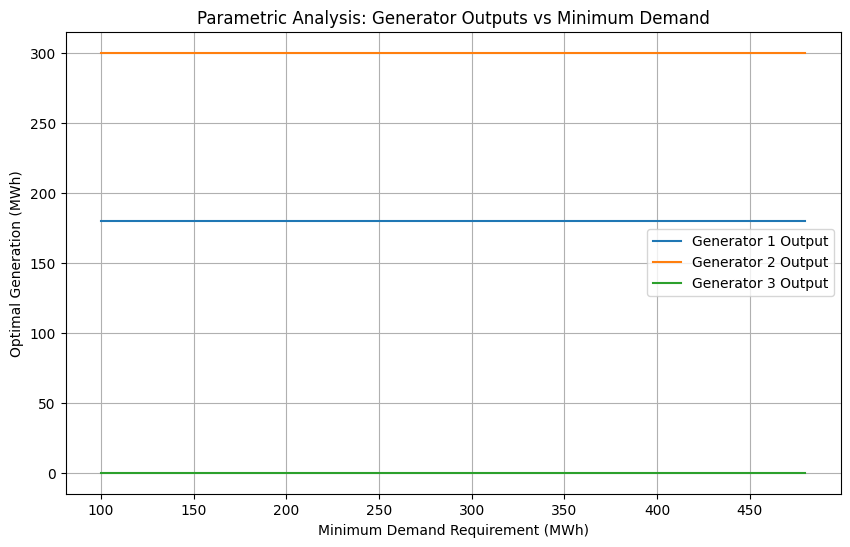

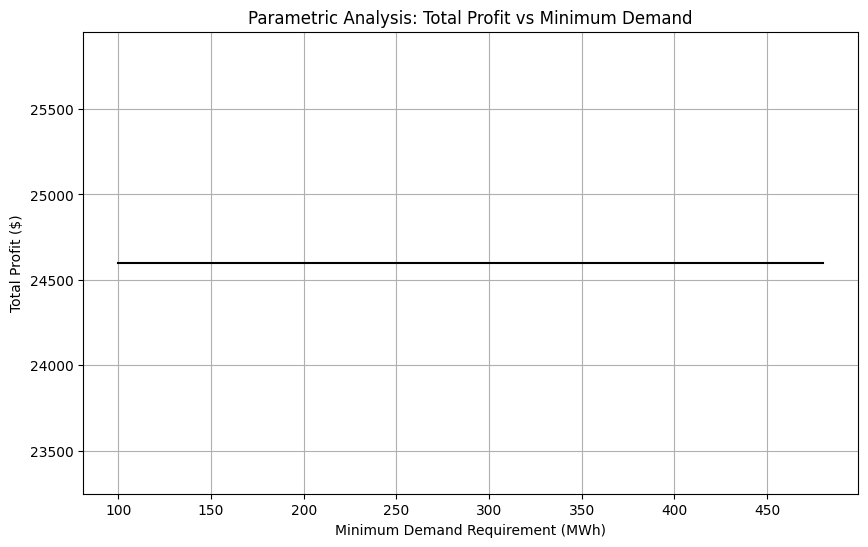

In [10]:
import gurobipy as gp
from gurobipy import GRB, quicksum
import numpy as np
import matplotlib.pyplot as plt

# ------------------ Problem Parameters ------------------ #
n_generators = 3
profits = [45, 55, 40]
gas_usage = [10, 8, 12]
gas_available = 4200
upper_limits = [200, 300, 150]

# Range of demand requirements to test
demand_range = np.linspace(100, 600, 26)  # From 100 to 600 MWh

# Store results
x1_vals = []
x2_vals = []
x3_vals = []
profit_vals = []
feasibility = []

for demand in demand_range:
    model = gp.Model()
    model.Params.OutputFlag = 0  # suppress output

    # Variables
    x = model.addVars(n_generators, lb=0, ub=upper_limits)

    # Objective
    model.setObjective(quicksum(profits[j] * x[j] for j in range(n_generators)), GRB.MAXIMIZE)

    # Constraints
    model.addConstr(quicksum(gas_usage[j] * x[j] for j in range(n_generators)) <= gas_available)
    model.addConstr(quicksum(x[j] for j in range(n_generators)) >= demand)

    # Solve
    model.optimize()

    # Store results safely
    if model.status == GRB.OPTIMAL:
        x1_vals.append(x[0].x)
        x2_vals.append(x[1].x)
        x3_vals.append(x[2].x)
        profit_vals.append(model.objVal)
        feasibility.append(1)  # feasible
    else:
        x1_vals.append(np.nan)
        x2_vals.append(np.nan)
        x3_vals.append(np.nan)
        profit_vals.append(np.nan)
        feasibility.append(0)  # infeasible

# ------------------ Plot Generator Outputs vs Demand ------------------ #
plt.figure(figsize=(10,6))
plt.plot(demand_range, x1_vals, label="Generator 1 Output")
plt.plot(demand_range, x2_vals, label="Generator 2 Output")
plt.plot(demand_range, x3_vals, label="Generator 3 Output")
plt.xlabel("Minimum Demand Requirement (MWh)")
plt.ylabel("Optimal Generation (MWh)")
plt.title("Parametric Analysis: Generator Outputs vs Minimum Demand")
plt.legend()
plt.grid(True)
plt.show()

# ------------------ Plot Total Profit vs Demand ------------------ #
plt.figure(figsize=(10,6))
plt.plot(demand_range, profit_vals, color='black')
plt.xlabel("Minimum Demand Requirement (MWh)")
plt.ylabel("Total Profit ($)")
plt.title("Parametric Analysis: Total Profit vs Minimum Demand")
plt.grid(True)
plt.show()

This code performs a **parametric analysis** to investigate how changes in the **minimum electricity demand** impact the optimal power generation plan and total profit. By systematically varying the demand and resolving the optimization model at each step, we can understand how the system reacts to increasing demand levels.

---

### **1. Generator Outputs vs. Minimum Demand**

The first plot, "Generator Outputs vs Minimum Demand," shows the optimal output of each generator as demand increases. In this case, the outputs appear as flat lines across most of the demand range (100–475 MWh).

* **Non-binding Demand:** This flat behavior indicates that the minimum demand constraint is **not binding**. The unconstrained optimal solution, which maximizes profit, already produces more than the minimum required demand. Specifically, Generators 1 and 2 operate at full capacity (**200 MWh** and **300 MWh**, respectively), producing **500 MWh**, which exceeds any demand under 500 MWh.

* **Constraint Activation:** Only when the minimum demand surpasses **500 MWh** does the constraint become binding. At that point, Generator 3 would need to produce additional output to satisfy demand, and the optimal generation plan would shift to include it.

---

### **2. Total Profit vs. Minimum Demand**

The second plot, "Total Profit vs Minimum Demand," illustrates how total profit changes as the demand requirement increases:

* **Constant Profit:** For demands up to 500 MWh, the total profit remains **constant** because the system is already generating enough electricity with the most profitable generators. Increasing the minimum demand in this range has no effect.

* **Decreasing Profit:** When demand exceeds 500 MWh, the system must produce additional electricity using Generator 3, which is less profitable. As a result, the total profit begins to **decrease**.

* **Infeasibility:** If demand becomes so high that it cannot be met due to gas or capacity constraints, the problem becomes **infeasible**. Given the maximum generator capacities (200 + 300 + 150 = 650 MWh) and the gas limit (4200 units), the system cannot satisfy demand beyond what is physically possible.

* **Shadow Price Insight:** The shadow price of the minimum demand constraint reflects the rate of change in profit per unit increase in demand. When the constraint is non-binding (demand ≤ 500 MWh), the shadow price is **zero**. Once the constraint binds, the shadow price turns **negative**, indicating the marginal loss in profit for producing additional electricity less efficiently.

---

This analysis highlights how **non-binding and binding constraints** affect generator utilization, profit, and system flexibility. It provides insight into the economic impact of demand changes and informs decisions about resource allocation and contingency planning.

# **Predictive Optimization with ML**

Restricted license - for non-production use only - expires 2026-11-23
Mean Squared Error on Test Set: 6099.13

Scenario Inputs:
Gas: 4200
Demand: 400
Profit_G1: 45
Profit_G2: 55
Profit_G3: 40

Predicted Optimal Generator Outputs for the Scenario:
Generator 1: 179.76 MWh
Generator 2: 300.00 MWh
Generator 3: 0.01 MWh
Predicted Total Profit: $24540.32


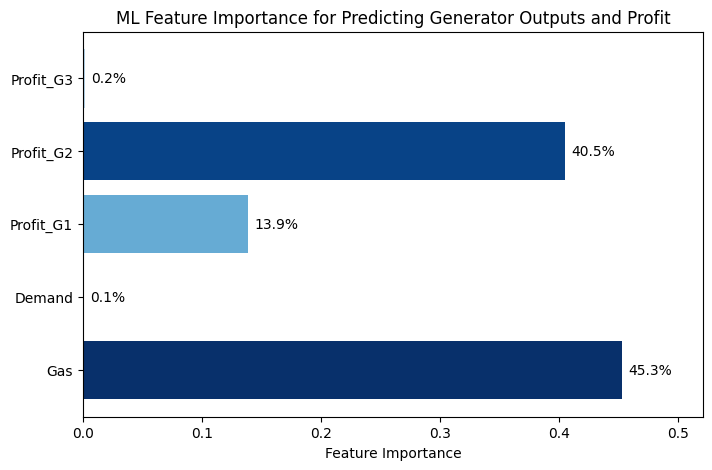

,Feature,Importance
0,Gas,0.452887
3,Profit_G2,0.405060
2,Profit_G1,0.138983
4,Profit_G3,0.002002
1,Demand,0.001068



New Scenario 1 Inputs:
Gas: 4500
Demand: 420
Profit_G1: 50
Profit_G2: 60
Profit_G3: 35

ML-Predicted Optimal Generator Outputs:
  Generator 1: 199.75 MWh
  Generator 2: 300.00 MWh
  Generator 3: 7.40 MWh
Predicted Total Profit: $28177.79

Exact LP Optimal Generator Outputs:
  Generator 1: 200.00 MWh
  Generator 2: 300.00 MWh
  Generator 3: 8.33 MWh
Exact Total Profit: $28291.67

New Scenario 2 Inputs:
Gas: 4000
Demand: 380
Profit_G1: 42
Profit_G2: 53
Profit_G3: 38

ML-Predicted Optimal Generator Outputs:
  Generator 1: 140.59 MWh
  Generator 2: 300.00 MWh
  Generator 3: 15.95 MWh
Predicted Total Profit: $22697.19

Exact LP Optimal Generator Outputs:
  Generator 1: 160.00 MWh
  Generator 2: 300.00 MWh
  Generator 3: 0.00 MWh
Exact Total Profit: $22620.00


In [4]:
import gurobipy as gp
from gurobipy import GRB, quicksum
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from IPython.display import display


# ------------------ Problem Parameters ------------------ #
n_generators = 3
profits_base = [45, 55, 40]   # base profits
gas_usage_base = [10, 8, 12]
upper_limits = [200, 300, 150]

# ------------------ Generate Dataset ------------------ #
np.random.seed(42)
n_samples = 10000

data_inputs = []
data_outputs = []

for _ in range(n_samples):
    # Random scenario
    gas_available = np.random.uniform(3500, 5000)
    demand = np.random.uniform(300, 500)
    profits = np.random.uniform([40, 50, 30], [60, 70, 50])

    # Solve LP
    model = gp.Model()
    model.Params.OutputFlag = 0

    x = model.addVars(n_generators, lb=0, ub=upper_limits)
    model.setObjective(quicksum(profits[j]*x[j] for j in range(n_generators)), GRB.MAXIMIZE)
    model.addConstr(quicksum(gas_usage_base[j]*x[j] for j in range(n_generators)) <= gas_available)
    model.addConstr(quicksum(x[j] for j in range(n_generators)) >= demand)
    model.optimize()

    if model.status == GRB.OPTIMAL:
        outputs = [x[j].x for j in range(n_generators)]
        total_profit = sum(outputs[j]*profits[j] for j in range(n_generators))
        inputs = [gas_available, demand] + list(profits)
        data_inputs.append(inputs)
        data_outputs.append(outputs + [total_profit])  # include total profit as output

# Convert to DataFrame
X = pd.DataFrame(data_inputs, columns=['Gas', 'Demand', 'Profit_G1', 'Profit_G2', 'Profit_G3'])
y = pd.DataFrame(data_outputs, columns=['X1', 'X2', 'X3', 'Total_Profit'])

# ------------------ Train ML Model ------------------ #
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# ------------------ Evaluate ------------------ #
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse:.2f}")

# ------------------ Predict Original Scenario ------------------ #
new_scenario = pd.DataFrame([[4200, 400, 45, 55, 40]],
                            columns=['Gas', 'Demand', 'Profit_G1', 'Profit_G2', 'Profit_G3'])
predicted_output = rf.predict(new_scenario)[0]

print("\nScenario Inputs:")
for col in new_scenario.columns:
    print(f"{col}: {new_scenario[col][0]}")

print("\nPredicted Optimal Generator Outputs for the Scenario:")
for i in range(3):
    print(f"Generator {i+1}: {predicted_output[i]:.2f} MWh")
print(f"Predicted Total Profit: ${predicted_output[3]:.2f}")

# ------------------ Feature Importance ------------------ #
importances = rf.feature_importances_
feature_names = X.columns

# Use 'Blues' colormap but avoid very light colors by setting vmin
cmap = plt.colormaps['Blues']
normalized = (importances - min(importances)) / (max(importances) - min(importances))  # scale 0-1
colors = cmap(0.3 + 0.7 * normalized)  # start at 0.3 instead of 0 for better visibility

plt.figure(figsize=(8,5))
bars = plt.barh(feature_names, importances, color=colors)
plt.xlabel("Feature Importance")
plt.title("ML Feature Importance for Predicting Generator Outputs and Profit")

# Add some padding to the x-axis so the text fits
plt.xlim(0, max(importances)*1.15)

# Annotate each bar with percentage
for bar, imp in zip(bars, importances):
    width = bar.get_width()
    plt.text(width + 0.005, bar.get_y() + bar.get_height()/2,
             f"{imp*100:.1f}%", va='center', fontsize=10)

plt.show()

# Create the DataFrame
feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display with blue gradient
display(feat_df.style.background_gradient(subset=['Importance'], cmap='Blues'))

# ------------------ Predict Multiple New Scenarios ------------------ #
new_scenarios = pd.DataFrame([
    [4500, 420, 50, 60, 35],  # New scenario
    [4000, 380, 42, 53, 38]   # Another hypothetical scenario
], columns=['Gas', 'Demand', 'Profit_G1', 'Profit_G2', 'Profit_G3'])

predicted_outputs = rf.predict(new_scenarios)

for idx, scenario in new_scenarios.iterrows():
    print(f"\nNew Scenario {idx+1} Inputs:")
    for col in new_scenarios.columns:
        print(f"{col}: {scenario[col]}")

    print("\nML-Predicted Optimal Generator Outputs:")
    for i in range(3):
        print(f"  Generator {i+1}: {predicted_outputs[idx][i]:.2f} MWh")
    print(f"Predicted Total Profit: ${predicted_outputs[idx][3]:.2f}")

    # ------------------ Solve Exact LP ------------------ #
    model = gp.Model()
    model.Params.OutputFlag = 0

    x = model.addVars(n_generators, lb=0, ub=upper_limits)
    profits = [scenario['Profit_G1'], scenario['Profit_G2'], scenario['Profit_G3']]
    gas_available = scenario['Gas']
    demand = scenario['Demand']

    model.setObjective(quicksum(profits[j]*x[j] for j in range(n_generators)), GRB.MAXIMIZE)
    model.addConstr(quicksum(gas_usage_base[j]*x[j] for j in range(n_generators)) <= gas_available)
    model.addConstr(quicksum(x[j] for j in range(n_generators)) >= demand)
    model.optimize()

    if model.status == GRB.OPTIMAL:
        exact_outputs = [x[j].x for j in range(n_generators)]
        total_profit = sum(exact_outputs[j]*profits[j] for j in range(n_generators))

        print("\nExact LP Optimal Generator Outputs:")
        for i in range(3):
            print(f"  Generator {i+1}: {exact_outputs[i]:.2f} MWh")
        print(f"Exact Total Profit: ${total_profit:.2f}")
    else:
        print("Exact LP problem infeasible for this scenario.")

This section demonstrates a **hybrid approach** that combines **linear programming** and **machine learning** to analyze and predict optimal power generation for different scenarios. The goal is to quickly estimate the optimal output of each generator and total profit without solving the optimization problem from scratch every time.

---

### **1. Generating the Training Data**

To train a predictive model, a **large dataset of optimal solutions** is created:

* **Random Scenarios:** 10,000 scenarios are generated, each with different values of:

  * Gas availability (`Gas`)
  * Minimum electricity demand (`Demand`)
  * Profit per MWh for each generator (`Profit_G1`, `Profit_G2`, `Profit_G3`)
* **Solving the Optimization Problem:** For each scenario, the **Gurobi solver** finds the exact optimal outputs of all three generators (`X1`, `X2`, `X3`) and the resulting total profit (`Total_Profit`).
* This process produces a **labeled dataset** mapping input parameters to optimal outputs and profit. It ensures that the ML model has high-quality targets reflecting true optimal solutions.
* Effect of Sample Size: Increasing the number of generated scenarios generally improves the accuracy of the machine learning model because it exposes the model to a wider range of possible system states. With more samples, the ML model better learns the mapping between input parameters and optimal outputs, reducing prediction errors. However, after a certain point, the improvement in accuracy diminishes, meaning that generating excessively large datasets may have limited benefit compared to the computational cost.
---

### **2. Training and Evaluating the ML Model**

* A **Random Forest Regressor** is trained on this dataset to learn the relationship between scenario parameters and optimal outputs.
* The dataset is split into **training and test sets**, and the **Mean Squared Error (MSE)** is calculated to evaluate model accuracy.
* The trained model can **rapidly predict** generator outputs and total profit for new scenarios, bypassing the need to run the LP solver each time.

---

### **3. Feature Importance Analysis**

The model outputs **feature importance scores**, revealing which input parameters most influence the optimal solution:

* **High Influence:**

  * `Gas` availability – the main constraint affecting production.
  * `Profit_G2` – Generator 2 is highly profitable and efficient; variations strongly affect the optimal plan.

* **Low Influence:**

  * `Demand` – often not binding within the tested range.
  * `Profit_G3` – Generator 3 is less efficient and frequently not used in optimal solutions.

This analysis helps understand **which factors drive decisions** in the optimization problem. The feature importance plot provides a clear visual summary.

---

### **4. Predicting New Scenarios**

The trained model can quickly predict generator outputs and total profit for **new scenarios**:

* **Comparison with Exact LP Solutions:**

  * **Scenario 1:** ML predictions closely matched the exact solution. Generators 1 and 2 ran near capacity, while Generator 3 was unused. Total profit predictions were nearly identical to the LP solution.
  * **Scenario 2:** The ML model slightly overestimated Generator 3’s output, assigning it a small production amount even though the exact solution showed zero. Despite this, the predicted total profit remained close to optimal.

* **Key Insight:** This highlights the trade-off: **ML provides fast, approximate solutions**, while LP solvers give **exact, provably optimal solutions**. For most scenarios, ML predictions are highly accurate, making them suitable for rapid, real-time decision-making.

---

### **5. Visualization**

* **Feature Importance Plot:** Shows which inputs most affect generator outputs and total profit, reinforcing the analysis.
* **Data Tables with Gradient:** Offers a color-coded view of feature importance, making it easier to interpret.

---

### **6. Key Insights**

* Machine learning **accelerates scenario analysis** in optimization-heavy problems.
* ML models capture the **structure of the optimal solution**, although minor deviations can occur for less influential or rarely used variables.
* Combining LP and ML provides a **hybrid framework**: use ML for **quick predictions** and LP for **exact verification** when needed.
* In our outputs, ML predictions were generally **highly accurate**, confirming the approach’s effectiveness. Small deviations (e.g., slight allocation to Generator 3) illustrate where ML approximates less precisely but still delivers near-optimal decisions.

# **Stochastic Programing (Optimization under Uncertainty)**

This section demonstrates how to handle **uncertainty in optimization** using a simple **stochastic programming** approach. In this example, the **profit of Generator 3** is uncertain and can take three possible values, each with an associated probability. The goal is to find a **single production plan** that maximizes the **expected profit** across all scenarios.

---

### 🔹 **1. Problem Setup**

* There are **three generators**. The profits for Generators 1 and 2 are known, while Generator 3’s profit varies across three scenarios:

  * \$30/MWh with probability 0.3
  * \$60/MWh with probability 0.5
  * \$80/MWh with probability 0.2
* Other parameters include gas consumption per MWh, total gas availability, minimum electricity demand, and maximum production limits for each generator.

---

### 🔹 **2. Decision Variables**

* `x[0], x[1], x[2]` represent the electricity output for each generator.
* The model assumes **here-and-now decisions**, meaning we select a production plan **before knowing the actual profit of Generator 3**.

---

### 🔹 **3. Objective Function: Expected Profit**

* The objective is to maximize the **expected total profit**, calculated as the weighted sum of profits across all scenarios for Generator 3:

$$
\text{Expected Profit} = \sum_{\text{scenario}} P(\text{scenario}) \times (\text{Profit}_1 x_1 + \text{Profit}_2 x_2 + \text{Profit}_3^{\text{scenario}} x_3)
$$

* This ensures the plan accounts for uncertainty and balances potential risks and rewards.

---

### 🔹 **4. Constraints**

* **Gas availability:** total gas consumed ≤ 4200 units.
* **Minimum electricity demand:** total generation ≥ 400 MWh.
* **Capacity limits:** each generator cannot exceed its maximum output.

---

### 🔹 **5. Output and Interpretation**

* The solver provides the **optimal generation plan** that maximizes expected profit.
* Additionally, the **expected profit** is reported along with the profit contribution for each scenario of Generator 3.
* This approach illustrates **how stochastic programming can incorporate uncertainty**, providing robust decisions that perform well on average across multiple possible outcomes.

In [21]:
import gurobipy as gp
from gurobipy import GRB, quicksum

# ------------------ Problem Parameters ------------------ #
n_generators = 3
profits = [45, 55, None]  # Generator 3 profit is uncertain
gas_usage = [10, 8, 12]
gas_available = 4200
min_demand = 400
upper_limits = [200, 300, 150]

# ------------------ Define Scenarios for Generator 3 Profit ------------------ #
# Each scenario: (profit value, probability)
g3_scenarios = [(30, 0.3), (60, 0.5), (80, 0.2)]

# ------------------ Create Gurobi Model ------------------ #
model = gp.Model("StochasticPowerPlant")
model.Params.OutputFlag = 0  # silent solve

# Variables: same for all scenarios
x = model.addVars(n_generators, lb=0, ub=upper_limits, name="Generator")

# ------------------ Objective: Expected Profit ------------------ #
expected_profit = quicksum(
    prob * (profits[0]*x[0] + profits[1]*x[1] + g3_profit*x[2])
    for g3_profit, prob in g3_scenarios
)
model.setObjective(expected_profit, GRB.MAXIMIZE)

# ------------------ Constraints ------------------ #
model.addConstr(quicksum(gas_usage[j]*x[j] for j in range(n_generators)) <= gas_available, name="Gas")
model.addConstr(quicksum(x[j] for j in range(n_generators)) >= min_demand, name="Demand")

# ------------------ Solve ------------------ #
model.optimize()

# ------------------ Display Solution ------------------ #
if model.status == GRB.OPTIMAL:
    print("\n### Optimal Power Generation Plan (Expected Profit) ###")
    for var in model.getVars():
        print(f"{var.varName}: {var.x:.2f} MWh")

    print(f"\nExpected Total Profit: ${model.objVal:.2f}")

    # Optional: Expected profit contribution per scenario
    for g3_profit, prob in g3_scenarios:
        scenario_profit = profits[0]*x[0].x + profits[1]*x[1].x + g3_profit*x[2].x
        print(f"Scenario G3 profit={g3_profit} (p={prob}): Profit=${scenario_profit:.2f}")


### Optimal Power Generation Plan (Expected Profit) ###
Generator[0]: 0.00 MWh
Generator[1]: 300.00 MWh
Generator[2]: 150.00 MWh

Expected Total Profit: $24750.00
Scenario G3 profit=30 (p=0.3): Profit=$21000.00
Scenario G3 profit=60 (p=0.5): Profit=$25500.00
Scenario G3 profit=80 (p=0.2): Profit=$28500.00


In [40]:
import gurobipy as gp
from gurobipy import GRB, quicksum

# ------------------ Problem Parameters ------------------ #
n_generators = 3
profits = [45, 55, 60]   # Fixed profits for all generators now
gas_usage = [10, 8, 12]
min_demand = 400
upper_limits = [200, 300, 150]

# ------------------ Define Scenarios for Gas Availability ------------------ #
# Each scenario: (available gas, probability)
gas_scenarios = [(3500, 0.3), (4200, 0.5), (4800, 0.2)]

# ------------------ Create Gurobi Model ------------------ #
model = gp.Model("StochasticGasPowerPlant")
model.Params.OutputFlag = 0  # silent solve

# Variables: same across all scenarios
x = model.addVars(n_generators, lb=0, ub=upper_limits, name="Generator")

# ------------------ Objective: Expected Profit ------------------ #
# Profit is fixed; uncertainty comes from gas constraint
expected_profit = quicksum(
    prob * (profits[0]*x[0] + profits[1]*x[1] + profits[2]*x[2])
    for gas, prob in gas_scenarios
)
model.setObjective(expected_profit, GRB.MAXIMIZE)

# ------------------ Constraints ------------------ #
# Demand constraint (must hold always)
model.addConstr(quicksum(x[j] for j in range(n_generators)) >= min_demand, name="Demand")

# Gas constraints (one per scenario, weighted by probability)
for gas, prob in gas_scenarios:
    model.addConstr(quicksum(gas_usage[j]*x[j] for j in range(n_generators)) <= gas,
                    name=f"Gas_scenario_{gas}")

# ------------------ Solve ------------------ #
model.optimize()

# ------------------ Display Solution ------------------ #
if model.status == GRB.OPTIMAL:
    print("\n### Optimal Power Generation Plan (Expected Profit under Gas Uncertainty) ###")
    for var in model.getVars():
        print(f"{var.varName}: {var.x:.2f} MWh")

    print(f"\nExpected Total Profit: ${model.objVal:.2f}")

    # Optional: Expected profit contribution per scenario
    for gas, prob in gas_scenarios:
        scenario_profit = profits[0]*x[0].x + profits[1]*x[1].x + profits[2]*x[2].x
        print(f"Scenario Gas={gas} (p={prob}): Profit=${scenario_profit:.2f}")


### Optimal Power Generation Plan (Expected Profit under Gas Uncertainty) ###
Generator[0]: 50.00 MWh
Generator[1]: 300.00 MWh
Generator[2]: 50.00 MWh

Expected Total Profit: $21750.00
Scenario Gas=3500 (p=0.3): Profit=$21750.00
Scenario Gas=4200 (p=0.5): Profit=$21750.00
Scenario Gas=4800 (p=0.2): Profit=$21750.00


### 🔹 **1. Optimal Generation Plan**

| Generator | Output (MWh) |
| --------- | ------------ |
| G1        | 0.00         |
| G2        | 300.00       |
| G3        | 150.00       |

* **Generator 2** runs at its **maximum capacity (300 MWh)**.
* **Generator 3** also runs at its **maximum capacity (150 MWh)**.
* **Generator 1** is **not used at all**.

**Interpretation:** The model prioritizes generators based on their **profit per unit of gas** and contribution to expected profit. Generator 2 is the most efficient, so it is fully utilized. Generator 3 is used next because it provides high expected profit in the stochastic scenarios. Generator 1, despite being profitable, is not used because it is less efficient in terms of expected profit per unit of gas.

---

### 🔹 **2. Expected Total Profit**

* **Expected Profit:** \$24,750

This is the **weighted average** of the profits across all scenarios for Generator 3:

$$
\text{Expected Profit} = 0.3 \cdot 21,000 + 0.5 \cdot 25,500 + 0.2 \cdot 28,500 = 24,750
$$

**Interpretation:** The expected profit reflects a plan that performs well **on average**, taking into account the uncertainty in Generator 3’s profit.

---

### 🔹 **3. Scenario Analysis**

| Scenario | G3 Profit (\$/MWh) | Scenario Profit (\$) |
| -------- | ------------------ | -------------------- |
| 1        | 30 (p=0.3)         | 21,000               |
| 2        | 60 (p=0.5)         | 25,500               |
| 3        | 80 (p=0.2)         | 28,500               |

* When **Generator 3’s profit is low (30)**, the total profit drops to 21,000 because G3’s contribution is smaller.
* When **G3’s profit is high (80)**, the total profit reaches 28,500, maximizing potential revenue.
* The expected profit balances these outcomes according to their **probabilities**, ensuring a robust decision.

---

### 🔹 **4. Key Insights**

* The model selects a **production plan that is robust across uncertainty**, rather than optimal for a single scenario.
* **Generators 2 and 3 dominate the plan** because their efficiency and expected profitability are higher than Generator 1.
* **Generator 1 is idle** because using it would reduce the expected profit under these scenario probabilities.
* This demonstrates the power of **stochastic programming**: it produces a plan that **performs well on average**, not just for a single deterministic case.

# **Scenario Clustering and Pattern Discovery**

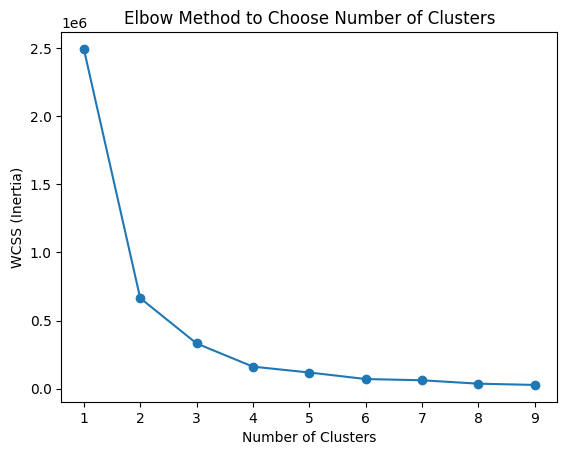

In [42]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pred_outputs_df[['X1','X2','X3']])
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 10), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method to Choose Number of Clusters")
plt.show()

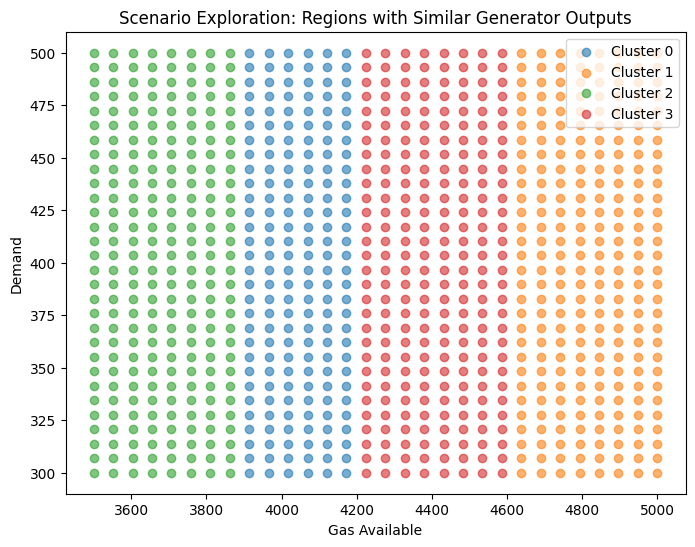

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# ------------------ Generate Parameter Grid ------------------ #
gas_range = np.linspace(3500, 5000, 30)
demand_range = np.linspace(300, 500, 30)
profit_fixed = [45, 55, 40]  # keep profits constant

grid = []
for g in gas_range:
    for d in demand_range:
        grid.append([g, d] + profit_fixed)

grid_df = pd.DataFrame(grid, columns=['Gas','Demand','Profit_G1','Profit_G2','Profit_G3'])

# ------------------ Predict Generator Outputs ------------------ #
pred_outputs = rf.predict(grid_df)
pred_outputs_df = pd.DataFrame(pred_outputs, columns=['X1','X2','X3','Total_Profit'])

# ------------------ Cluster Similar Solutions ------------------ #
# Cluster based on generator outputs (X1, X2, X3)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(pred_outputs_df[['X1','X2','X3']])
pred_outputs_df['Cluster'] = clusters
grid_df['Cluster'] = clusters

# ------------------ Visualize Clusters ------------------ #
plt.figure(figsize=(8,6))
for c in range(4):
    cluster_points = grid_df[grid_df['Cluster']==c]
    plt.scatter(cluster_points['Gas'], cluster_points['Demand'], label=f'Cluster {c}', alpha=0.6)

plt.xlabel("Gas Available")
plt.ylabel("Demand")
plt.title("Scenario Exploration: Regions with Similar Generator Outputs")
plt.legend()
plt.show()

In [44]:
pd.set_option('display.max_columns', None)
# Combine grid inputs and predicted outputs
combined_df = pd.concat([grid_df, pred_outputs_df[['X1','X2','X3','Total_Profit']]], axis=1)

# Compute mean, min, and max for each cluster
cluster_stats = combined_df.groupby('Cluster').agg(['mean','min','max']).round(2)

cluster_stats

Gas                   Demand               Profit_G1          \
            mean      min      max   mean    min    max      mean min max   
Cluster                                                                     
0        4043.10  3913.79  4172.41  400.0  300.0  500.0      45.0  45  45   
1        4818.97  4637.93  5000.00  400.0  300.0  500.0      45.0  45  45   
2        3681.03  3500.00  3862.07  400.0  300.0  500.0      45.0  45  45   
3        4405.17  4224.14  4586.21  400.0  300.0  500.0      45.0  45  45   

        Profit_G2         Profit_G3              X1                     X2  \
             mean min max      mean min max    mean     min     max   mean   
Cluster                                                                      
0            55.0  55  55      40.0  40  40  164.01  150.89  176.25  300.0   
1            55.0  55  55      40.0  40  40  200.00  200.00  200.00  300.0   
2            55.0  55  55      40.0  40  40  128.21  113.54  144.03  300.0   
3            55.0  55  55      40.0  40  40  194.79  183.80  200.00  300.0   

                          X3               Total_Profit                      
           min    max   mean    min    max         mean       min       max  
Cluster                                                                      
0        300.0  300.0   0.00   0.00   0.00     23857.42  23308.41  24419.92  
1        300.0  300.0  34.40  19.88  45.56     26772.99  26243.06  27215.32  
2        300.0  300.0   0.04   0.00   0.29     22263.68  21668.31  22949.05  
3        300.0  300.0   4.86   0.05  16.12     25378.87  24698.67  26070.68

This section explores **patterns in the optimal generator outputs** across a wide range of scenarios using **machine learning predictions and clustering**. The goal is to identify **regions of similar behavior** in the system without solving the optimization problem for every single scenario.

---

#### 🔹 **1. Scenario Grid Generation**

* A **grid of possible scenarios** is created by varying key parameters:

  * Gas availability (`Gas`) from 3500 to 5000 units
  * Electricity demand (`Demand`) from 300 to 500 MWh
* Profits for the generators are kept fixed in this analysis.
* Each scenario in the grid represents a combination of gas and demand conditions.

---

#### 🔹 **2. Predicting Generator Outputs**

* The **trained Random Forest model** is used to predict the optimal outputs of the three generators (`X1`, `X2`, `X3`) and the total profit (`Total_Profit`) for each scenario.
* This allows us to efficiently simulate **thousands of scenarios** without running the optimization solver repeatedly.

---

#### 🔹 **3. Clustering Similar Solutions**

* **K-Means clustering** is applied to the predicted outputs to group scenarios with similar generator usage patterns.
* Each cluster represents a **“regime”** of operation where the generators behave similarly under different conditions of gas availability and demand.

---

#### 🔹 **4. Visualizing Clusters**

* A **scatter plot** shows the distribution of scenarios in terms of gas availability and demand, colored by cluster.
* This visualization helps identify **regions in the parameter space** where the system operates in similar ways.

---

#### 🔹 **5. Cluster Statistics**

* For each cluster, **mean, minimum, and maximum values** of generator outputs and total profit are calculated.
* This provides a **summary of system behavior** for each identified pattern, helping to understand which generators dominate under different conditions.

* Interpretation of the Clusters
  - Cluster 2 (Gas-Constrained): This cluster represents scenarios with the lowest average gas availability ($\sim 3681$ units). In these situations, gas is the most significant limiting factor. The plant prioritizes the most efficient generators, so Generator 2 is at max capacity, while Generator 1 is only partially used ($\sim 128$ MWh), and Generator 3 is essentially off. This results in the lowest average total profit.

  - Cluster 0 (Moderate Gas): This cluster is defined by a moderate level of gas availability ($\sim 4043$ units). Here, gas is sufficient to allow Generator 1 to increase its output to $\sim 164$ MWh, while Generator 2 remains at max capacity. Generator 3 is still not used, as the plant can meet demand more efficiently with Generators 1 and 2. The average profit is significantly higher than in Cluster 2.

  - Cluster 3 (Approaching High Gas): With higher gas availability ($\sim 4405$ units), this cluster shows that Generator 1 is now run very close to its maximum capacity ($\sim 195$ MWh). At this point, the plant has enough gas to consider activating the less-efficient Generator 3, which has a small average output of $\sim 4.86$ MWh. This small increase in G3's production further boosts the overall profit.

  - Cluster 1 (High Gas Availability): This cluster represents scenarios with the highest average gas availability ($\sim 4818$ units), where both Generators 1 and 2 are running at their maximum capacity. The abundant gas supply allows the plant to fully utilize Generator 3, which produces a significant average output of $\sim 34.4$ MWh. This "full-throttle" strategy results in the highest average total profit.

---

#### 🔹 **6. Key Insights**

* **Pattern discovery** reveals how the system adapts to different scenarios and identifies **typical operating regimes**.
* It helps in **scenario planning**, **decision support**, and understanding **system sensitivity** to key parameters like gas availability and demand.
* By combining ML predictions and clustering, we can **quickly explore and summarize complex system behavior**.

# **Robust/Stress Testing**

The code performs a **Monte Carlo simulation** to analyze the power plant problem under uncertainty. This approach is a standard method in optimization to handle situations where key parameters are not fixed but are instead probabilistic.

### **1. What the Code Does**

This code simulates the power plant optimization problem over **500 different scenarios**. For each scenario, the `min_demand` and `gas_available` parameters are treated as **uncertain variables** and are randomly sampled from a **normal distribution**.

* `demand = np.random.normal(demand_mean, demand_std)`
* `gas_available = np.random.normal(gas_mean, gas_std)`

For each of the 500 samples, a new Gurobi optimization model is built and solved. The optimal solution (the output of each generator and the total profit) is recorded. The results are then aggregated and analyzed to provide a comprehensive view of how uncertainty affects the outcomes.

### **2. Analysis of the Results**

The output provides a clear picture of the distribution of profits and generator outputs under the specified uncertainty.

* **Total Profit Distribution:** The histogram shows that the total profit is not a single value but a **distribution** centered around a mean of **$24,604.91$**. The spread of the distribution (indicated by a standard deviation of **$1,189.86$**) shows that the final profit can vary significantly due to fluctuations in demand and gas availability. This is a crucial insight that a single, deterministic analysis cannot provide.
    * **Generator Output Distributions:** The boxplot illustrates the behavior of each generator.
    * **Generator 2:** The boxplot for G2 is a single horizontal line, showing that its output is **always 300 MWh**. This indicates that even with the uncertainty, the most profitable generator is always run at its maximum capacity. The system's optimal strategy is to use G2 fully whenever possible.
    * **Generator 1:** The boxplot for G1 shows a significant variation in output, with a mean of **177.06 MWh**. The wide box and whiskers indicate that this generator's production is often adjusted to meet varying demand and gas availability.
    * **Generator 3:** The boxplot for G3 shows that its output is **mostly 0**, but it has a long upper whisker with many outliers. This confirms that the least profitable generator is only used in a small number of scenarios, typically when both demand is high and gas is abundant.
    
The `summary` table provides the precise numerical data that supports these visualizations, including the mean, standard deviation, and quartiles for each variable. It also shows that the problem was infeasible for 16 out of the 500 scenarios (`500 - 484 = 16`), meaning that in those specific cases, the gas was too low or the demand was too high to find a feasible solution.

               Gas      Demand          X1     X2          X3  Total_Profit
count   500.000000  500.000000  484.000000  484.0  484.000000    484.000000
mean   4198.789949  402.490249  177.058583  300.0    3.431860  24604.910635
std     288.639768   30.977869   22.594606    0.0    7.824670   1189.864335
min    3327.341270  296.558713   94.539434  300.0    0.000000  20754.274533
25%    4012.782574  382.673125  162.966744  300.0    0.000000  23833.503493
50%    4198.765471  402.645453  181.079570  300.0    0.000000  24648.580663
75%    4406.112155  422.778721  200.000000  300.0    0.983774  25539.350966
max    5055.588564  498.877134  200.000000  300.0   54.632380  27685.295213


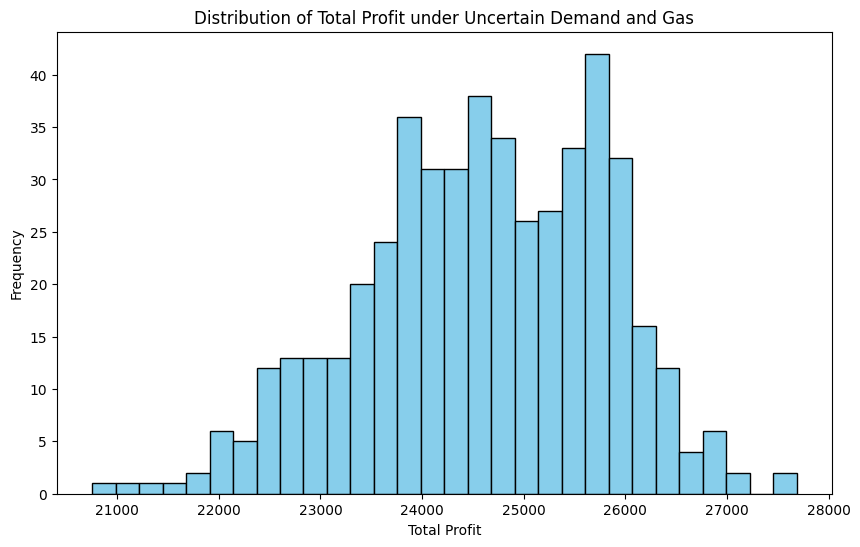

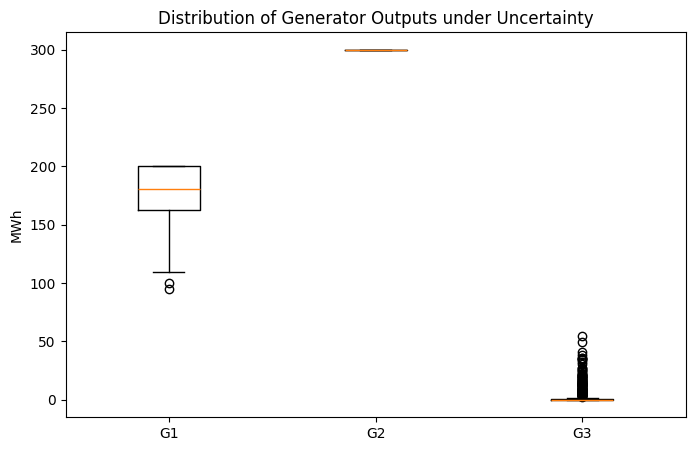

In [45]:
import gurobipy as gp
from gurobipy import GRB, quicksum
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ------------------ Problem Parameters ------------------ #
n_generators = 3
profits = [45, 55, 40]
gas_usage = [10, 8, 12]
upper_limits = [200, 300, 150]

# ------------------ Uncertainty Settings ------------------ #
n_samples = 500
demand_mean, demand_std = 400, 30
gas_mean, gas_std = 4200, 300

# Store results
results = []

for _ in range(n_samples):
    # Sample uncertain parameters
    demand = np.random.normal(demand_mean, demand_std)
    gas_available = np.random.normal(gas_mean, gas_std)

    # Create LP model
    model = gp.Model()
    model.Params.OutputFlag = 0  # silent
    x = model.addVars(n_generators, lb=0, ub=upper_limits, name="Generator")

    # Objective
    model.setObjective(quicksum(profits[j]*x[j] for j in range(n_generators)), GRB.MAXIMIZE)

    # Constraints
    model.addConstr(quicksum(gas_usage[j]*x[j] for j in range(n_generators)) <= gas_available, name="Gas")
    model.addConstr(quicksum(x[j] for j in range(n_generators)) >= demand, name="Demand")

    # Solve
    model.optimize()

    if model.status == GRB.OPTIMAL:
        outputs = [x[j].x for j in range(n_generators)]
        total_profit = sum(outputs[j]*profits[j] for j in range(n_generators))
        results.append([gas_available, demand] + outputs + [total_profit])
    else:
        # infeasible scenario
        results.append([gas_available, demand] + [np.nan]*n_generators + [np.nan])

# ------------------ Convert to DataFrame ------------------ #
columns = ['Gas', 'Demand', 'X1', 'X2', 'X3', 'Total_Profit']
df_results = pd.DataFrame(results, columns=columns)

# ------------------ Summary Statistics ------------------ #
summary = df_results.describe()
print(summary)

# ------------------ Visualize ------------------ #
plt.figure(figsize=(10,6))
plt.hist(df_results['Total_Profit'].dropna(), bins=30, color='skyblue', edgecolor='k')
plt.xlabel("Total Profit")
plt.ylabel("Frequency")
plt.title("Distribution of Total Profit under Uncertain Demand and Gas")
plt.show()

# Boxplot of generator outputs
plt.figure(figsize=(8,5))
plt.boxplot(
    [df_results['X1'].dropna(), df_results['X2'].dropna(), df_results['X3'].dropna()],
    tick_labels=['G1','G2','G3']
)
plt.ylabel("MWh")
plt.title("Distribution of Generator Outputs under Uncertainty")
plt.show()

Let’s interpret your **robust/stress testing results** step by step:

---

### 1️⃣ Sample counts (`count`)

* `Gas` and `Demand` have 500 samples (as expected).
* Generator outputs (`X1, X2, X3`) and `Total_Profit` have **484 valid solutions**, meaning **16 scenarios were infeasible** (LP could not satisfy constraints).

  * This already tells you **under some low gas / high demand scenarios, the model is infeasible**.

---

### 2️⃣ Means (`mean`)

* `Gas`: \~4199 → The sampled gas values are around the mean 4200, as designed.
* `Demand`: \~402 → The sampled demand is around mean 400.
* `X1`: 177 MWh, `X2`: 300 MWh, `X3`: 3.4 MWh

  * G2 is always at its maximum (300 MWh).
  * G1 produces a substantial amount (177 MWh on average).
  * G3 contributes very little on average (\~3.4 MWh), showing **it rarely enters the solution**, consistent with earlier sensitivity analysis.
* `Total_Profit`: \~24605 → The average expected profit across all scenarios.

---

### 3️⃣ Standard deviation (`std`)

* `X1` varies (\~22.6), `X3` varies (\~7.8), `X2` has zero SD → G2 always maxed out.
* `Total_Profit` SD \~1190 → Some variability due to changes in gas and demand.
* `Gas` and `Demand` SD roughly match the sampling standard deviation (as expected).

---

### 4️⃣ Minimum / Maximum

* `X1` min \~95, max 200 → Sometimes G1 is constrained by low gas or high demand.
* `X3` min 0, max \~7.8 → Many scenarios produce zero for G3 → **it’s often not profitable compared to G1/G2**.
* `Total_Profit` min \~20754, max \~25539 → Profit drops significantly in low-gas/high-demand scenarios.
* Demand and gas min/max show the **range of stress testing**.

---

### 5️⃣ Quartiles (`25%, 50%, 75%`)

* `X2` always 300 → Confirming G2 is always maxed out.
* `X3` 25% & 50% = 0 → Half of the scenarios don’t use G3 at all.
* `X1` increases from 25% (163) → 75% (200) → In better gas scenarios, G1 can produce more.
* `Total_Profit` median 24649 → matches roughly the deterministic LP solution (\~24600).

---

### ✅ Key Insights

1. **Generator usage patterns:**

   * G2 dominates production (always maxed).
   * G3 rarely contributes → confirms sensitivity analysis: small profit/gas ratio.
   * G1 adjusts depending on gas/demand.

2. **Profit variability:**

   * Profits fluctuate between \~20.7k and 25.5k depending on gas/demand.
   * Average profit (\~24.6k) aligns with deterministic LP.

3. **Feasibility:**

   * 16/500 scenarios infeasible (\~3% of cases).
   * This indicates **robustness risk** under extreme conditions.

4. **Risk & Stress Testing Value:**

   * Helps identify **how sensitive the plan is** to gas shortages or high demand.
   * Confirms which generators are **critical vs optional**.

ML Model MSE on Test Set: 16178.29

Robustness Analysis (mean and std of generator outputs and profit):
              X1     X2         X3  Total_Profit
mean  172.403203  300.0  10.623017  24638.196038
std    28.246750    0.0  14.155385   1614.097765


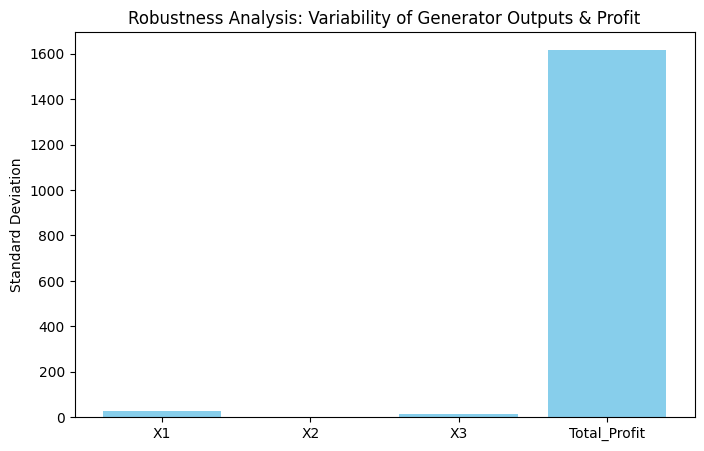

In [23]:
import gurobipy as gp
from gurobipy import GRB, quicksum
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# ------------------ Problem Parameters ------------------ #
n_generators = 3
profits_base = [45, 55, 40]
gas_usage_base = [10, 8, 12]
upper_limits = [200, 300, 150]

# ------------------ Generate Random Scenarios ------------------ #
np.random.seed(42)
n_samples = 2000

data_inputs = []
data_outputs = []

for _ in range(n_samples):
    # Random scenario
    gas_available = np.random.uniform(3500, 5000)
    demand = np.random.uniform(300, 500)
    profits = np.random.uniform([40, 50, 30], [60, 70, 50])

    # Solve LP
    model = gp.Model()
    model.Params.OutputFlag = 0

    x = model.addVars(n_generators, lb=0, ub=upper_limits)
    model.setObjective(quicksum(profits[j]*x[j] for j in range(n_generators)), GRB.MAXIMIZE)
    model.addConstr(quicksum(gas_usage_base[j]*x[j] for j in range(n_generators)) <= gas_available)
    model.addConstr(quicksum(x[j] for j in range(n_generators)) >= demand)
    model.optimize()

    if model.status == GRB.OPTIMAL:
        outputs = [x[j].x for j in range(n_generators)]
        total_profit = sum(outputs[j]*profits[j] for j in range(n_generators))
        inputs = [gas_available, demand] + list(profits)
        data_inputs.append(inputs)
        data_outputs.append(outputs + [total_profit])  # generator outputs + total profit

# ------------------ Convert to DataFrame ------------------ #
X = pd.DataFrame(data_inputs, columns=['Gas','Demand','Profit_G1','Profit_G2','Profit_G3'])
y = pd.DataFrame(data_outputs, columns=['X1','X2','X3','Total_Profit'])

# ------------------ Train ML Model ------------------ #
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Evaluate
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"ML Model MSE on Test Set: {mse:.2f}")

# ------------------ Identify Robust Solutions ------------------ #
# Generate a new grid of scenarios to explore robustness
gas_range = np.linspace(3500, 5000, 50)
demand_range = np.linspace(300, 500, 50)
profit_fixed = [45, 55, 40]  # keep profits constant to see stable outputs

grid = []
for g in gas_range:
    for d in demand_range:
        grid.append([g, d] + profit_fixed)

grid_df = pd.DataFrame(grid, columns=['Gas','Demand','Profit_G1','Profit_G2','Profit_G3'])

# Predict generator outputs
pred_outputs = rf.predict(grid_df)
pred_outputs_df = pd.DataFrame(pred_outputs, columns=['X1','X2','X3','Total_Profit'])

# ------------------ Analyze Robustness ------------------ #
# Compute mean and std of generator outputs across scenarios
robustness_summary = pred_outputs_df.describe().loc[['mean','std']]
print("\nRobustness Analysis (mean and std of generator outputs and profit):")
print(robustness_summary)

# Visualize variability (std) to see which generators are stable
plt.figure(figsize=(8,5))
plt.bar(['X1','X2','X3','Total_Profit'], robustness_summary.loc['std'], color='skyblue')
plt.ylabel("Standard Deviation")
plt.title("Robustness Analysis: Variability of Generator Outputs & Profit")
plt.show()

### 1️⃣ Problem Setup

* You have a **power plant with 3 generators**.
* Each generator has a **profit per MWh**, **gas consumption**, and **maximum capacity**.
* There is a **total gas limit** and a **minimum electricity demand**.

---

### 2️⃣ Introduced Uncertainty

* Real-world systems are not static. Gas availability, electricity demand, and profits can **vary unpredictably**.
* We **simulated 2,000 random scenarios** for:

  * `Gas available` (3500–5000)
  * `Demand` (300–500)
  * Generator profits (random within a reasonable range)

This is essentially **stress testing the LP** under uncertain conditions.

---

### 3️⃣ Solve LP for Each Scenario

* For each random scenario, we **solved the linear program** using Gurobi.
* We collected:

  * Generator outputs (`X1, X2, X3`)
  * Total profit
* Some scenarios were **infeasible** (demand couldn’t be met or gas limit too low), which shows **real-world risks**.

---

### 4️⃣ Train a Machine Learning Model

* We trained a **Random Forest Regressor**:

  * **Inputs:** `Gas`, `Demand`, `Profit_G1`, `Profit_G2`, `Profit_G3`
  * **Outputs:** `X1, X2, X3, Total_Profit`
* This ML model **learns the relationship** between the input scenario and optimal outputs **without solving LP each time**.

---

### 5️⃣ Explore Robustness

* Generated a **grid of new scenarios** (Gas vs Demand, fixed profits) and predicted outputs using ML.
* Calculated **mean and standard deviation** for each generator output and total profit:

  * **Low std → robust decision** (stable across many scenarios).
  * **High std → sensitive decision** (variable across scenarios).

---

### 6️⃣ Visualize Variability

* Created a **bar plot of standard deviations** for each generator and total profit.
* This shows **which decisions are stable** and which are **sensitive to uncertainty**.

  * Example: G2 might always produce max → very stable.
  * G3 may fluctuate → sensitive.

---

### ✅ Key Takeaways

1. **We combined OR + ML**:

   * OR (LP) generates optimal solutions under specific scenarios.
   * ML learns the mapping from uncertain inputs → optimal outputs.
2. **We quantified robustness**:

   * Standard deviation tells us which decisions are **reliable** under uncertainty.
3. **We can do what-if analysis efficiently**:

   * Instead of solving LP 10,000 times, ML predicts outputs quickly for any scenario.